In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r'C:\Users\ThunderBolt\Downloads\data.csv')

In [3]:
df.head()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  ...  \
0                                     0.302646  ...   
1                                     0.303556  ...   
2                                     0.302035  ...   
3                                     0.303350  ...   
4                                     0.303475  ...   

   Net Income to Total Assets  Total assets to GNP price  No-credit Interval  \
0                    0.716845                   0.009219            0.622879   
1                    0.795297                   0.008323            0.623652   
2                    0.774670                   0.040003            0.623841   
3                    0.739555                   0.003252            0.622929   
4                    0.795016                   0.003878            0.623521   

   Gross Profit to Sales  Net Income to Stockholder's Equity  \
0               0.601453                            0.827890   
1               0.610237                            0.839969   
2               0.601449                            0.836774   
3               0.583538                            0.834697   
4               0.598782                            0.839973   

   Liability to Equity  Degree of Financial Leverage (DFL)  \
0             0.290202                            0.026601   
1             0.283846                            0.264577   
2             0.290189                            0.026555   
3             0.281721                            0.026697   
4             0.278514                            0.024752   

   Interest Coverage Ratio (Interest expense to EBIT)  Net Income Flag  \
0                                           0.564050                 1   
1                                           0.570175                 1   
2                                           0.563706                 1   
3                                           0.564663                 1   
4                                           0.575617                 1   

   Equity to Liability  
0             0.016469  
1             0.020794  
2           

In [4]:
## info about what all columns are there, whether columns are null or not null,data type of this

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [5]:
df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [6]:
# Computing the descriptive statistics of our numrerical features

df.describe()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  ...  \
count                                  6819.000000  ...   
mean                                      0.303623  ...   
std                                       0.011163  ...   
min                                       0.000000  ...   
25%                                       0.303466  ...   
50%                                       0.303525  ...   
75%                                       0.303585  ...   
max                                       1.000000  ...   

       Net Income to Total Assets  Total assets to GNP price  \
count                 6819.000000               6.819000e+03   
mean                     0.807760               1.862942e+07   
std                      0.040332               3.764501e+08   
min                      0.000000               0.000000e+00   
25%                      0.7

In [7]:
## checking null values

df.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
## to see duplicated values present or not
df[df.duplicated()].shape

# df.duplicated().sum()

(0, 96)

In [9]:
## if the dtype is INT64 then it is considered a categorical number

df.dtypes[df.dtypes == 'int64'].index

Index(['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag'], dtype='object')

## There are only three categorical data columns, we will explore these columns first

1. Target Class Distribution (Bankrupt)

In [10]:

df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Text(0.5, 1.0, 'Target Class Distribution (Bankrupt)')

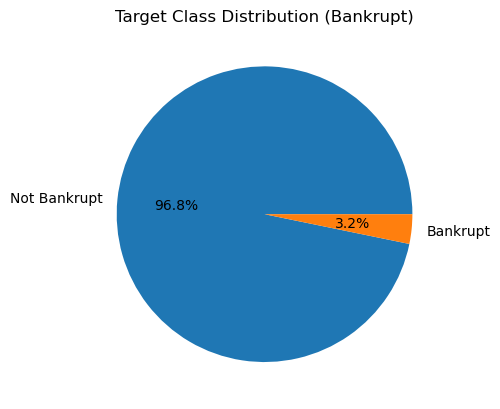

In [11]:
## create a pie chart

plt.pie(df['Bankrupt?'].value_counts(),labels=['Not Bankrupt', 'Bankrupt'],autopct='%1.1f%%')
plt.title('Target Class Distribution (Bankrupt)')

## Observation 

The data set looks very unbalanced. 
Therefore, it is necessary to consider balancing the dataset for best performance.

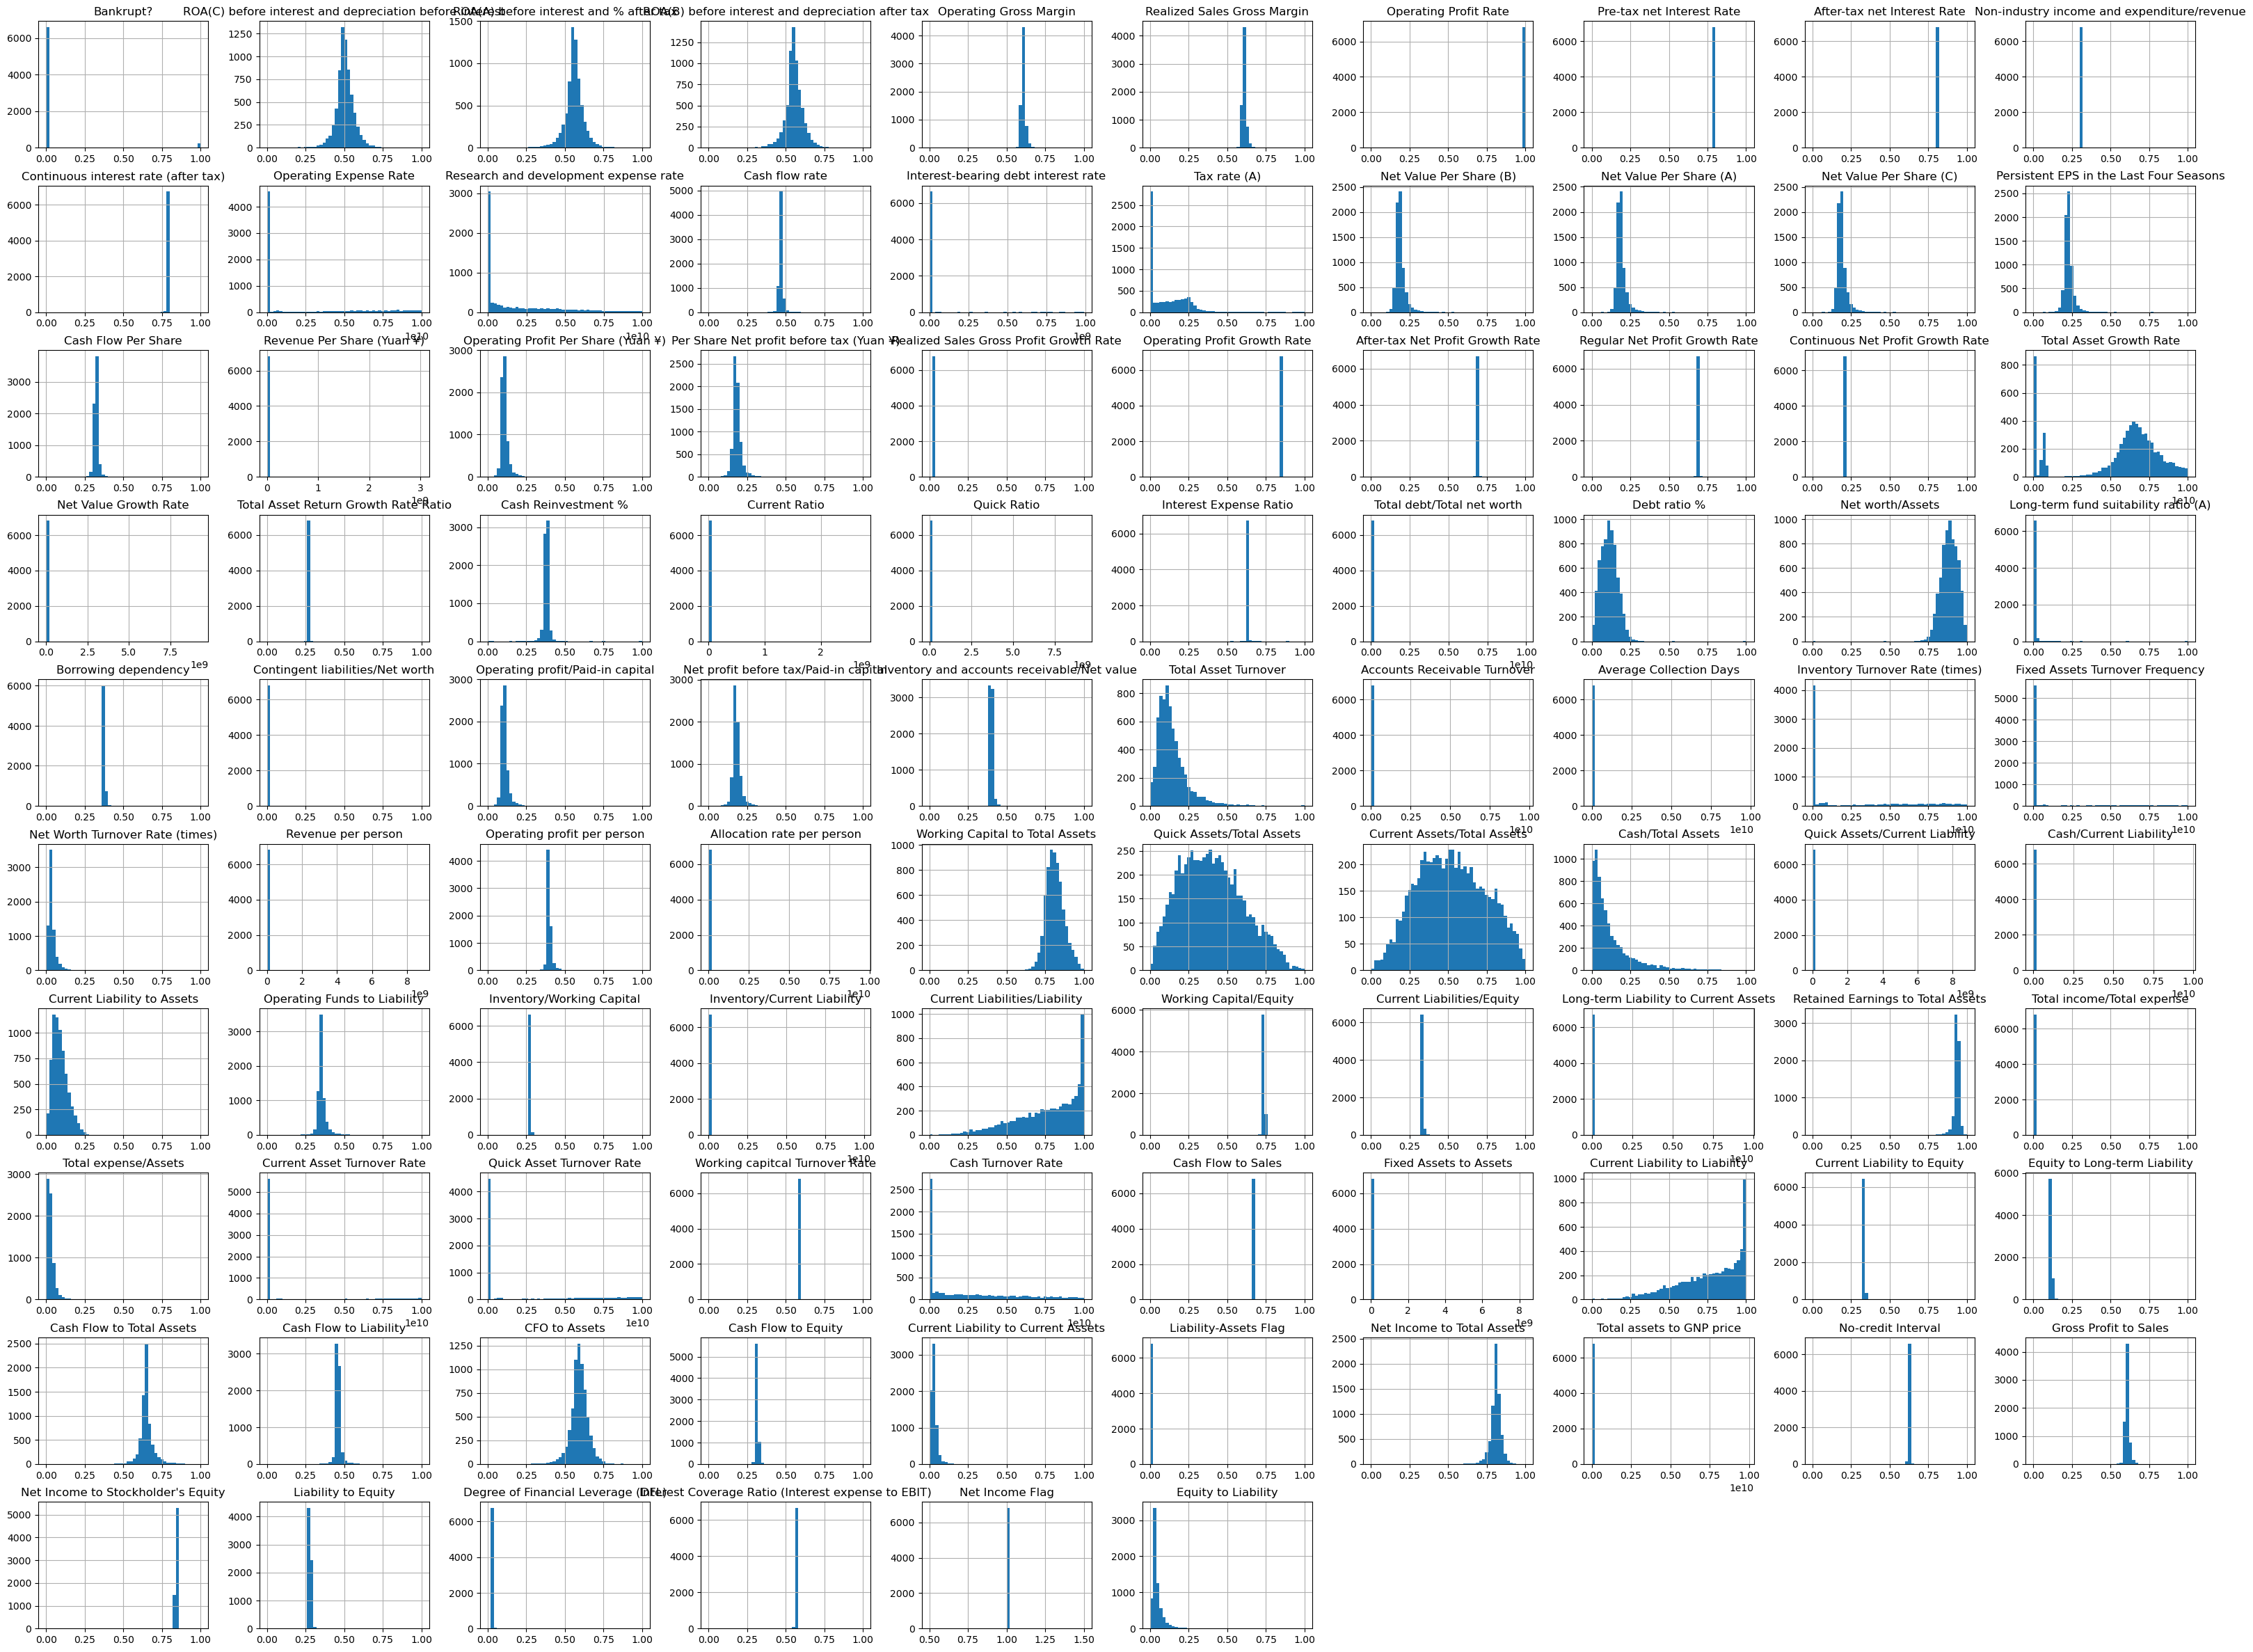

In [12]:
df.hist(figsize = (40,30), bins = 50)
plt.show()

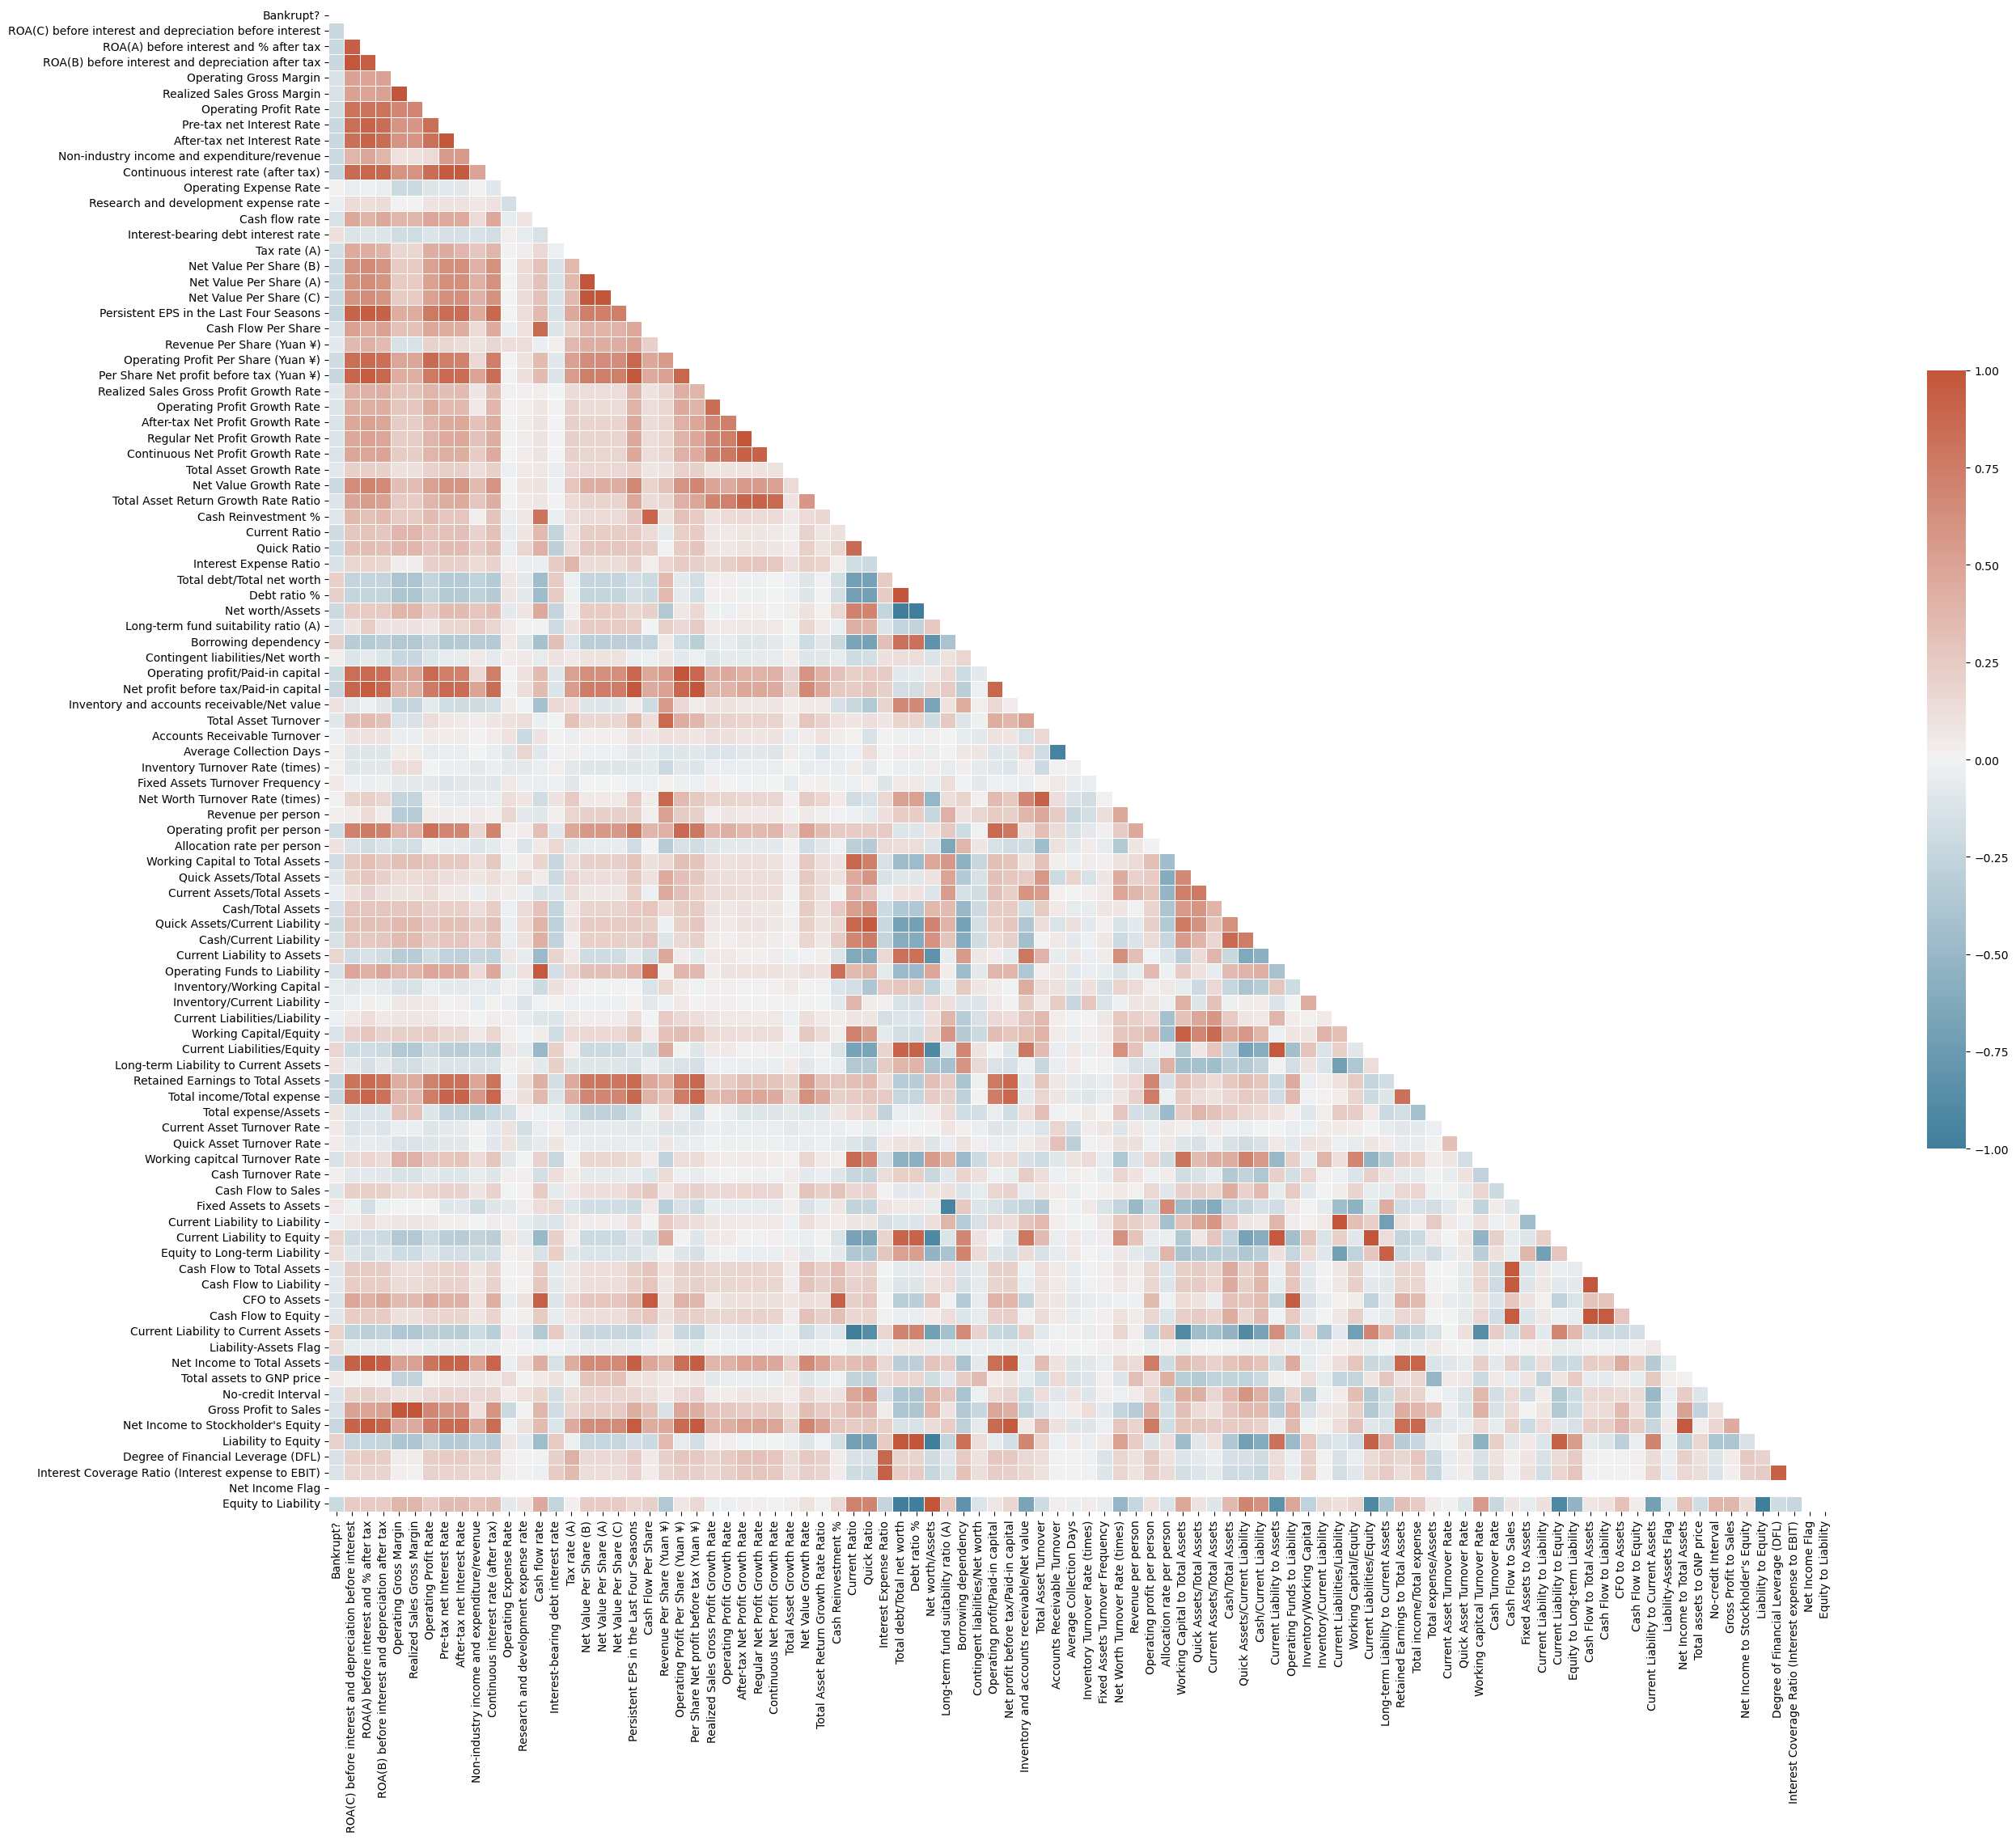

In [13]:
# EDA & VISUALIZATIONS

# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

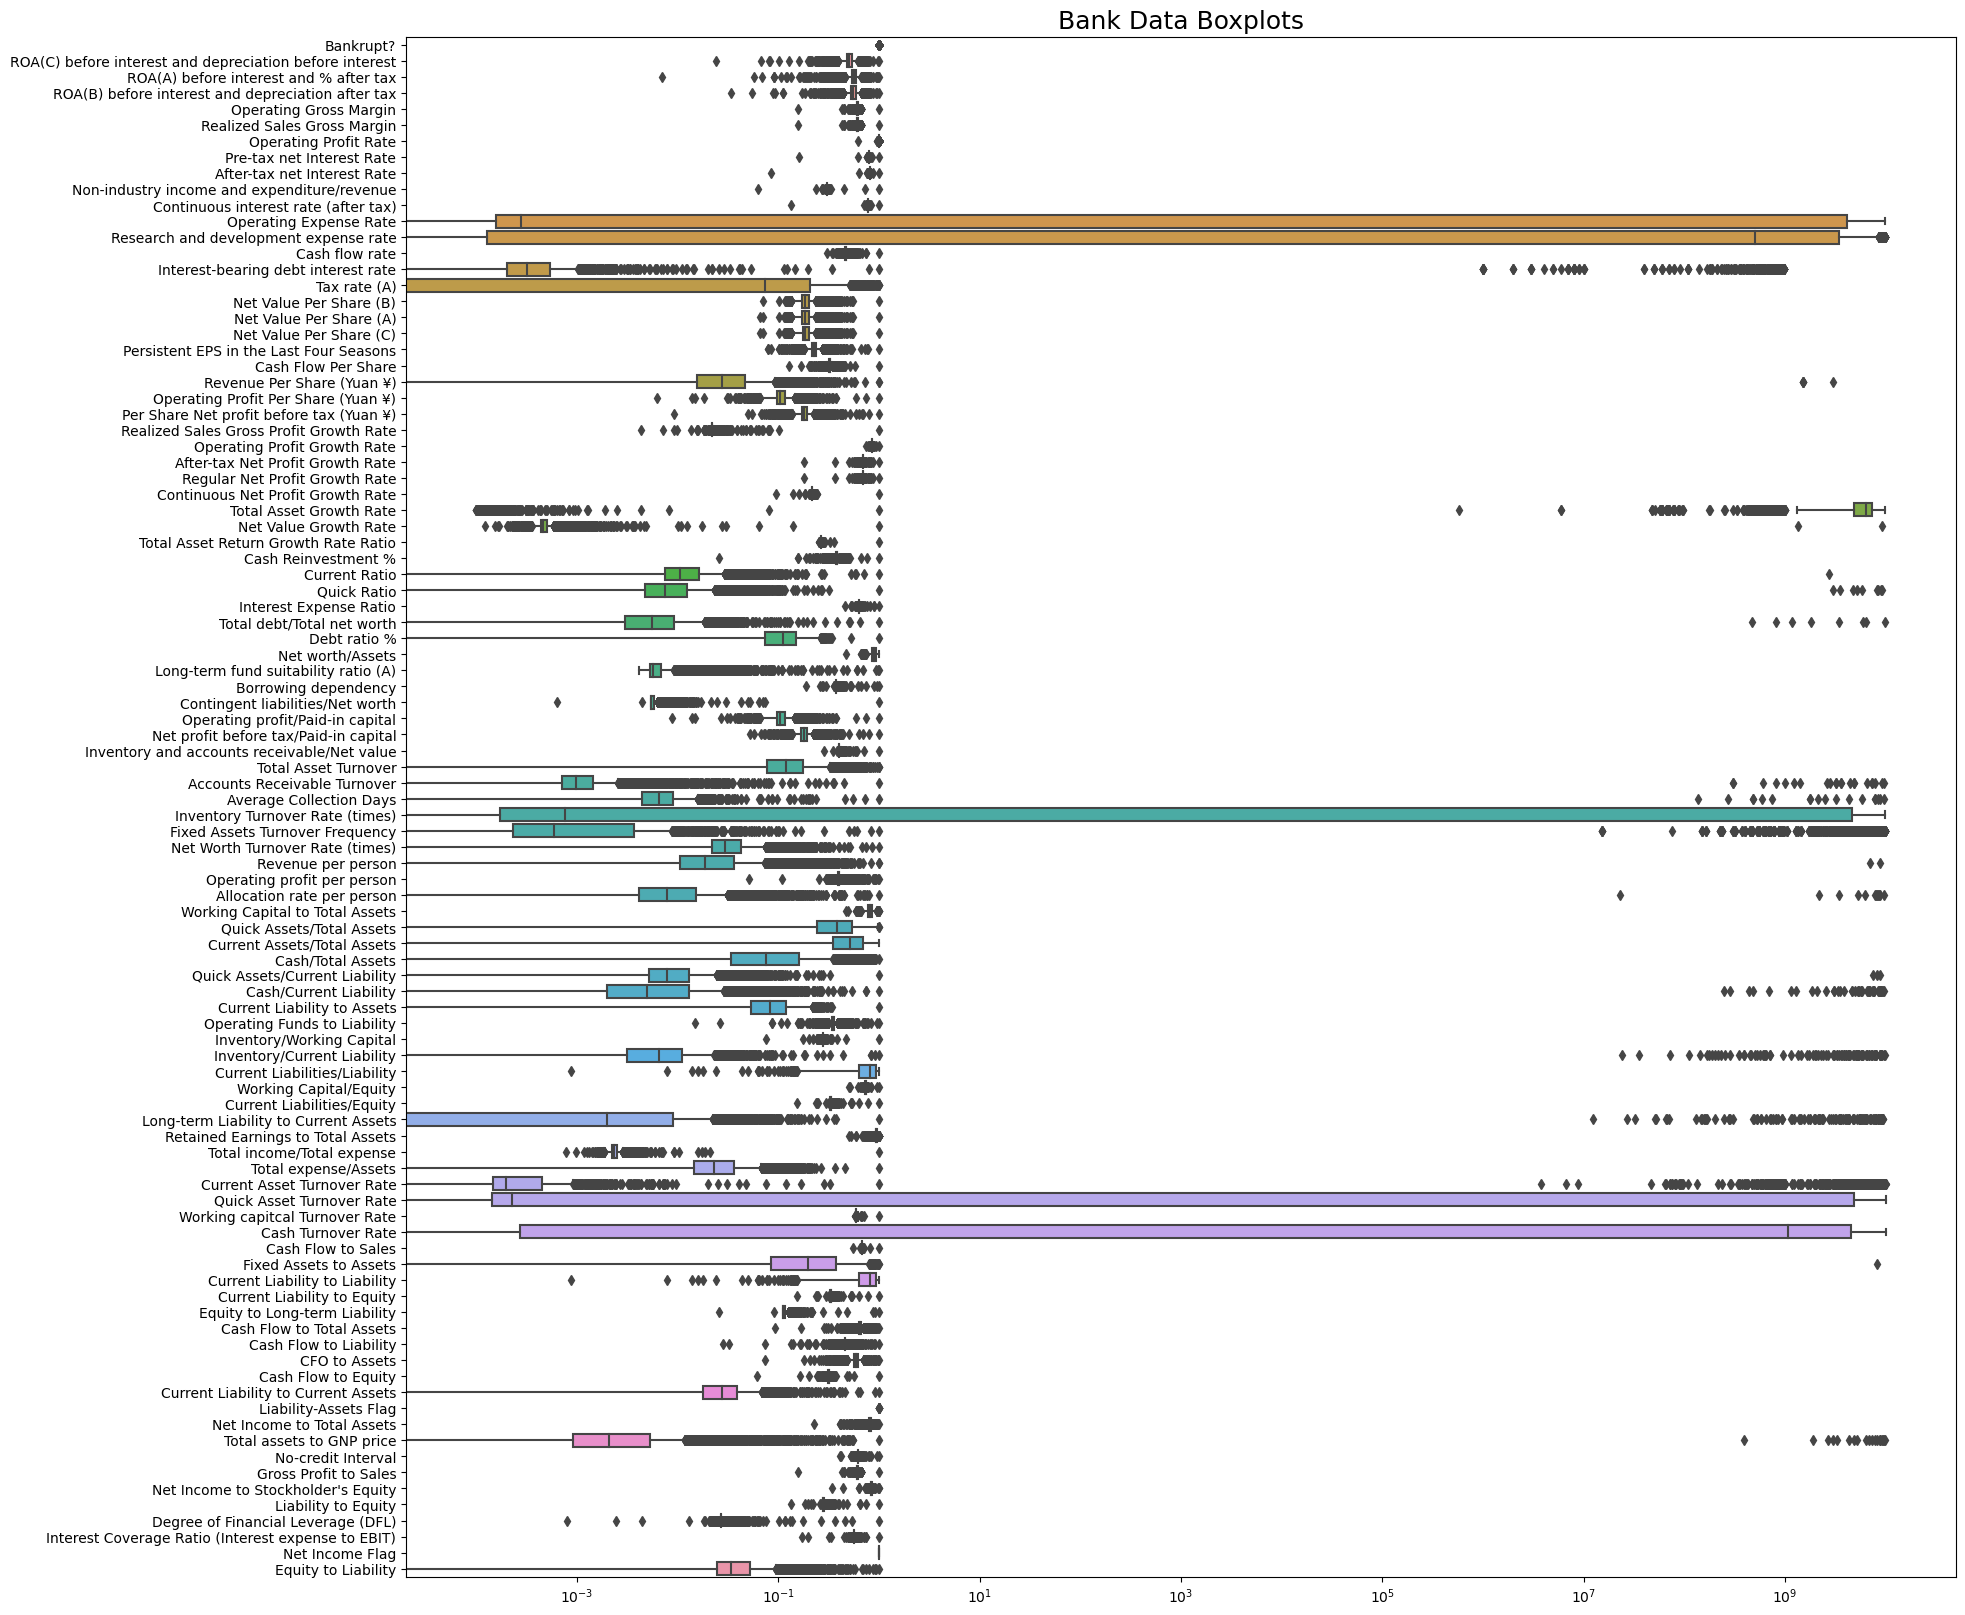

In [14]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

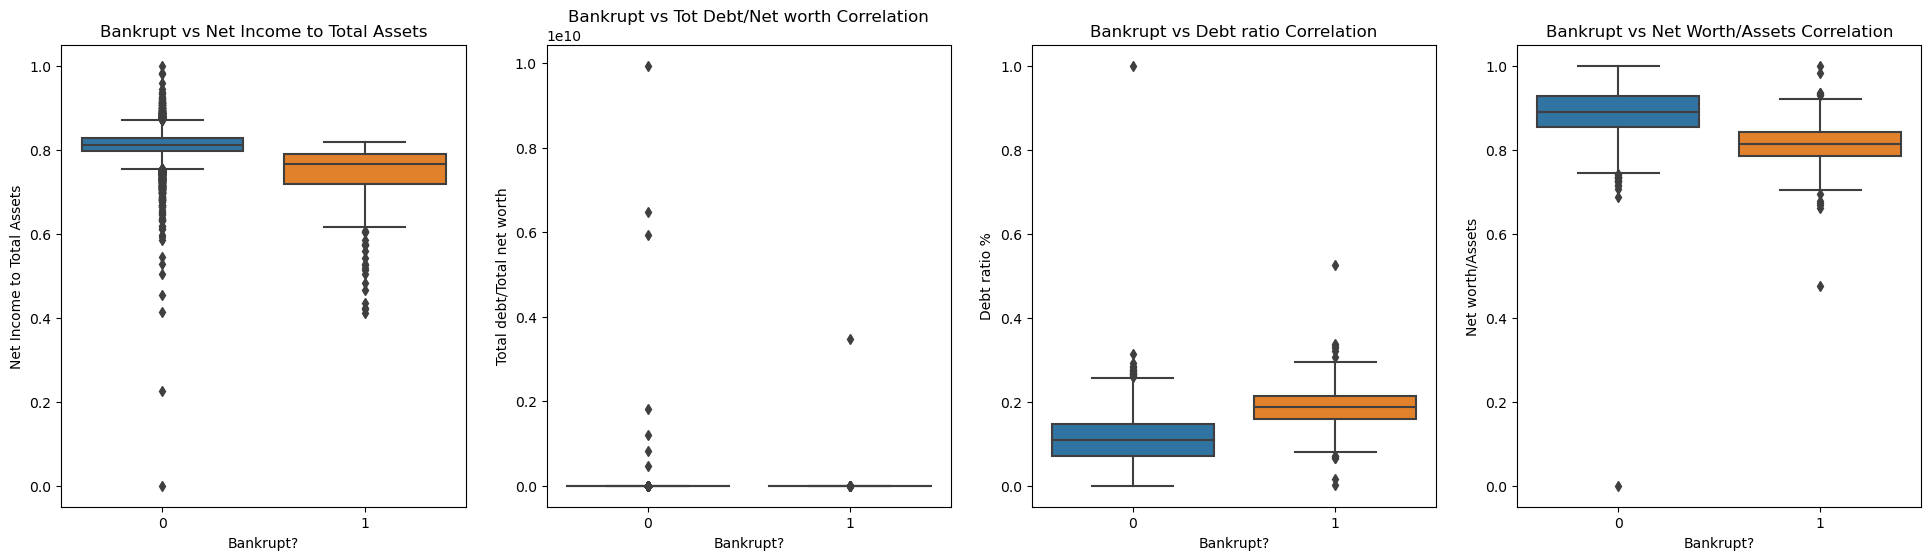

In [15]:
# Plotting interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y="Net Income to Total Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y="Total debt/Total net worth", data=df, ax=axes[1]) 
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y="Debt ratio %", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y="Net worth/Assets", data=df, ax=axes[3])  
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

plt.show()

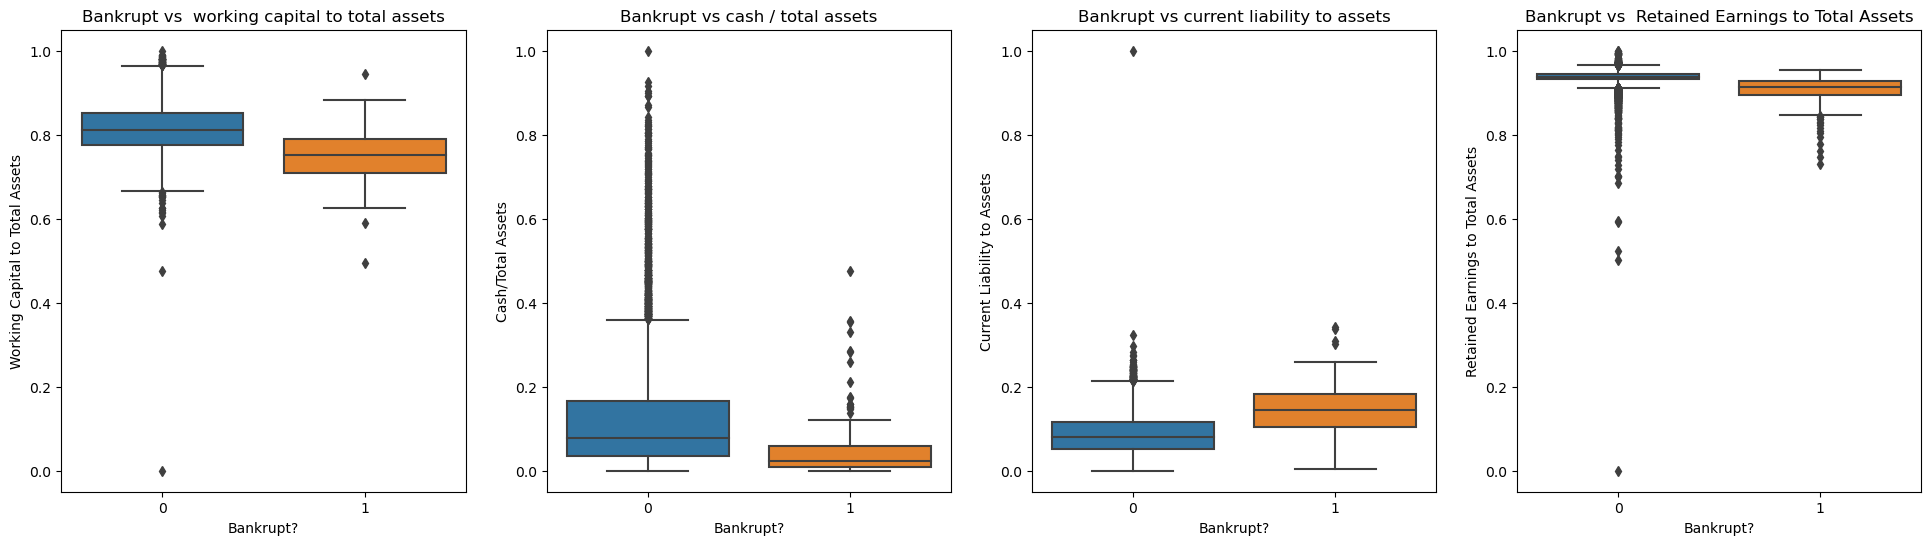

In [16]:
# Plotting other interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y="Working Capital to Total Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y="Cash/Total Assets", data=df, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y="Current Liability to Assets", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y="Retained Earnings to Total Assets", data=df, ax=axes[3])
axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

C:\Users\ThunderBolt\AppData\Local\Temp\ipykernel_33176\478670396.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
C:\Users\ThunderBolt\AppData\Local\Temp\ipykernel_33176\478670396.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tot_debt_

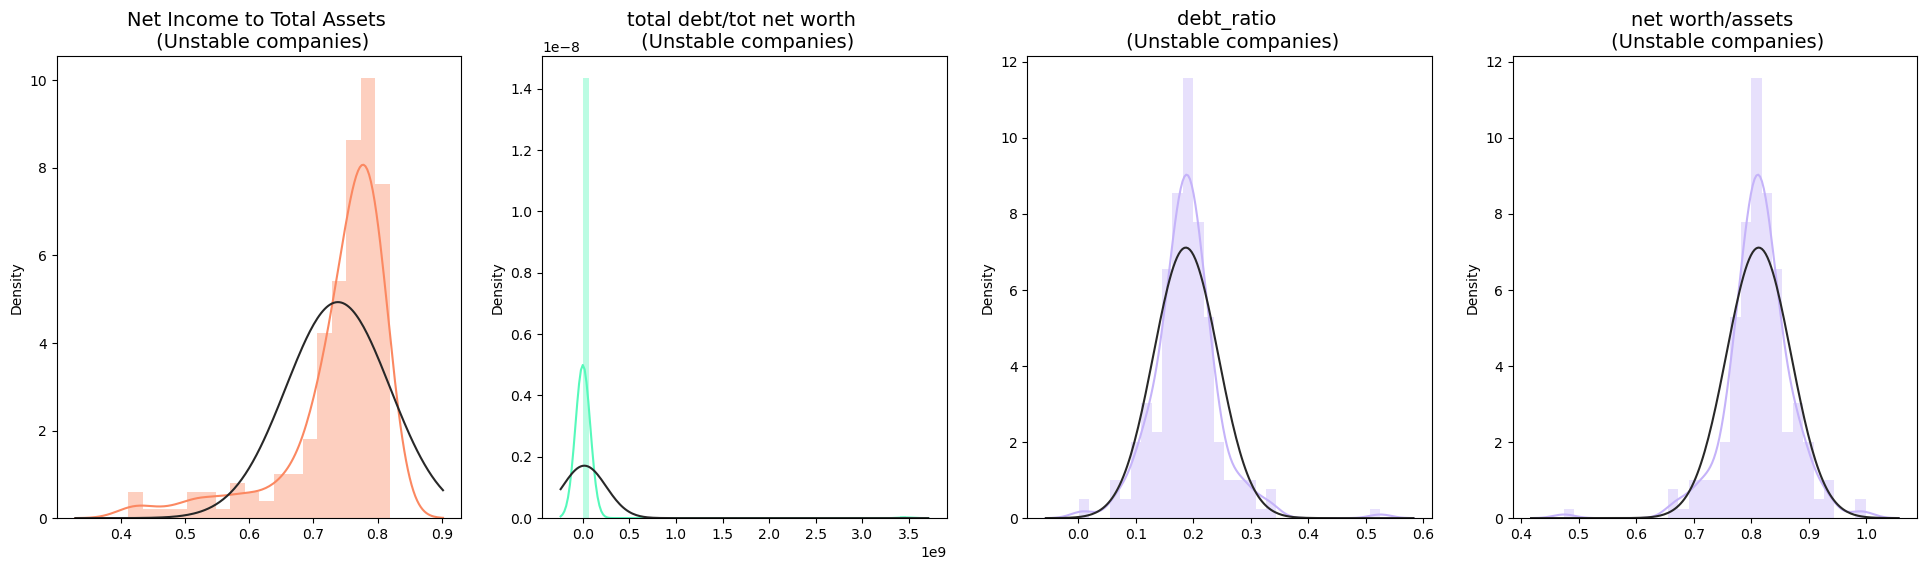

In [17]:
# Plotting the feature distributions for close to bankrputcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = df['Net Income to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = df['Total debt/Total net worth'].loc[df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = df['Debt ratio %'].loc[df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = df['Net worth/Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

In [18]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in df:
    new_df = outliers_removal(df[col],str(col),df)

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.4765270804 | Quartile 75: 0.5355628138
iqr: 0.05903573340000001
Cut Off: 0.08855360010000002
ROA(C) before interest and depreciation before interest Lower: 0.3879734803
ROA(C) before interest and depreciation before interest Upper: 0.6241164139
ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.5355429568 | Quartile 75: 0.58915721765
iqr: 0.053614260849999984
Cut Off: 0.08042139127499998
ROA(A) before interest and % after tax Lower: 0.455121565525
ROA(A) before interest and % after tax Upper: 0.669578608925
ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
---------------------------------------

-----------------------------------------------------------------
Quartile 25: 0.09610467862 | Quartile 75: 0.11592733729999999
iqr: 0.019822658679999994
Cut Off: 0.02973398801999999
Operating profit/Paid-in capital Lower: 0.0663706906
Operating profit/Paid-in capital Upper: 0.14566132531999998
Operating profit/Paid-in capital outliers for close to bankruptcy cases: 446
-----------------------------------------------------------------
Quartile 25: 0.1693763668 | Quartile 75: 0.1916069678
iqr: 0.02223060099999999
Cut Off: 0.03334590149999998
Net profit before tax/Paid-in capital Lower: 0.13603046530000001
Net profit before tax/Paid-in capital Upper: 0.22495286929999997
Net profit before tax/Paid-in capital outliers for close to bankruptcy cases: 476
-----------------------------------------------------------------
Quartile 25: 0.39740267915000005 | Quartile 75: 0.4045507708
iqr: 0.007148091649999966
Cut Off: 0.010722137474999949
Inventory and accounts receivable/Net value Lower: 0.38668

-----------------------------------------------------------------
Quartile 25: 0.02679115669 | Quartile 75: 0.026913184215
iqr: 0.00012202752499999858
Cut Off: 0.00018304128749999787
Degree of Financial Leverage (DFL) Lower: 0.026608115402500004
Degree of Financial Leverage (DFL) Upper: 0.027096225502499998
Degree of Financial Leverage (DFL) outliers for close to bankruptcy cases: 1503
-----------------------------------------------------------------
Quartile 25: 0.5651583958 | Quartile 75: 0.5657247095
iqr: 0.0005663136999999319
Cut Off: 0.0008494705499998978
Interest Coverage Ratio (Interest expense to EBIT) Lower: 0.5643089252500002
Interest Coverage Ratio (Interest expense to EBIT) Upper: 0.5665741800499999
Interest Coverage Ratio (Interest expense to EBIT) outliers for close to bankruptcy cases: 1421
-----------------------------------------------------------------
Quartile 25: 1.0 | Quartile 75: 1.0
iqr: 0.0
Cut Off: 0.0
Net Income Flag Lower: 1.0
Net Income Flag Upper: 1.0
Net I

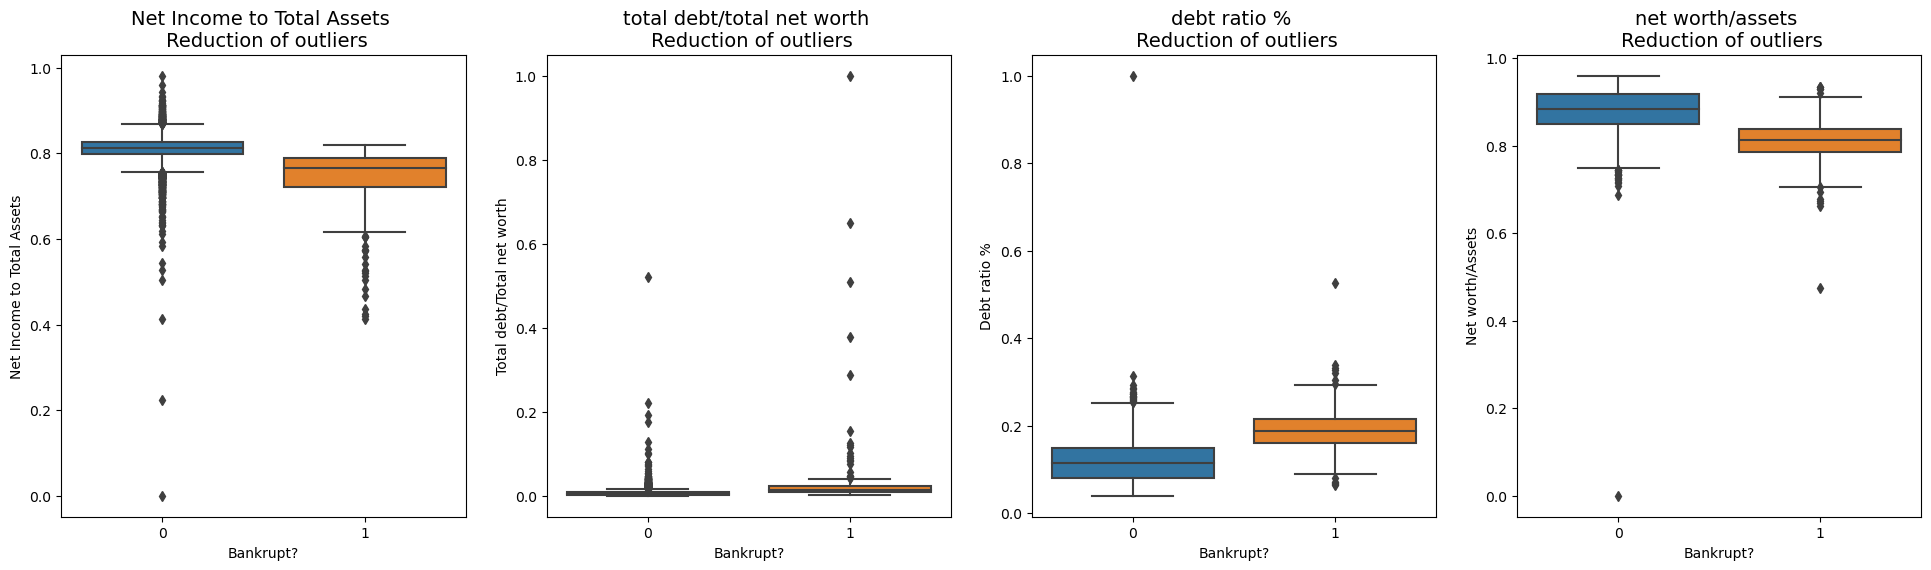

In [19]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y="Net Income to Total Assets", data=new_df,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y="Total debt/Total net worth", data=new_df,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y="Debt ratio %", data=new_df,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y='Net worth/Assets', data=new_df,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)
        
plt.show()

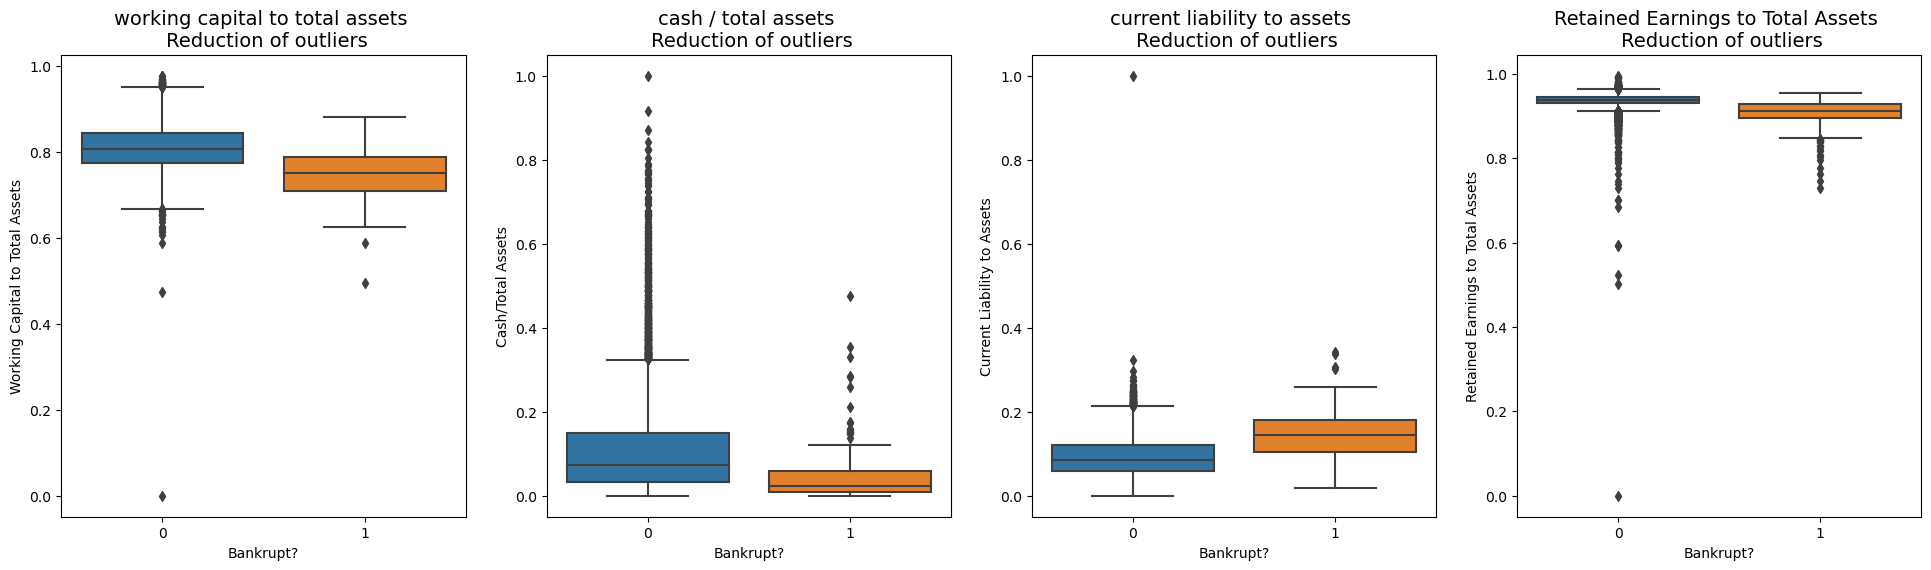

In [20]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y='Working Capital to Total Assets', data=new_df,ax=ax1) 
ax1.set_title("working capital to total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y='Cash/Total Assets', data=new_df,ax=ax2) 
ax2.set_title("cash / total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y='Current Liability to Assets', data=new_df,ax=ax3) 
ax3.set_title("current liability to assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y='Retained Earnings to Total Assets', data=new_df,ax=ax4) 
ax4.set_title("Retained Earnings to Total Assets \n Reduction of outliers", fontsize=14)
        
plt.show()

C:\Users\ThunderBolt\AppData\Local\Temp\ipykernel_33176\3441387778.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
C:\Users\ThunderBolt\AppData\Local\Temp\ipykernel_33176\3441387778.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tot_deb

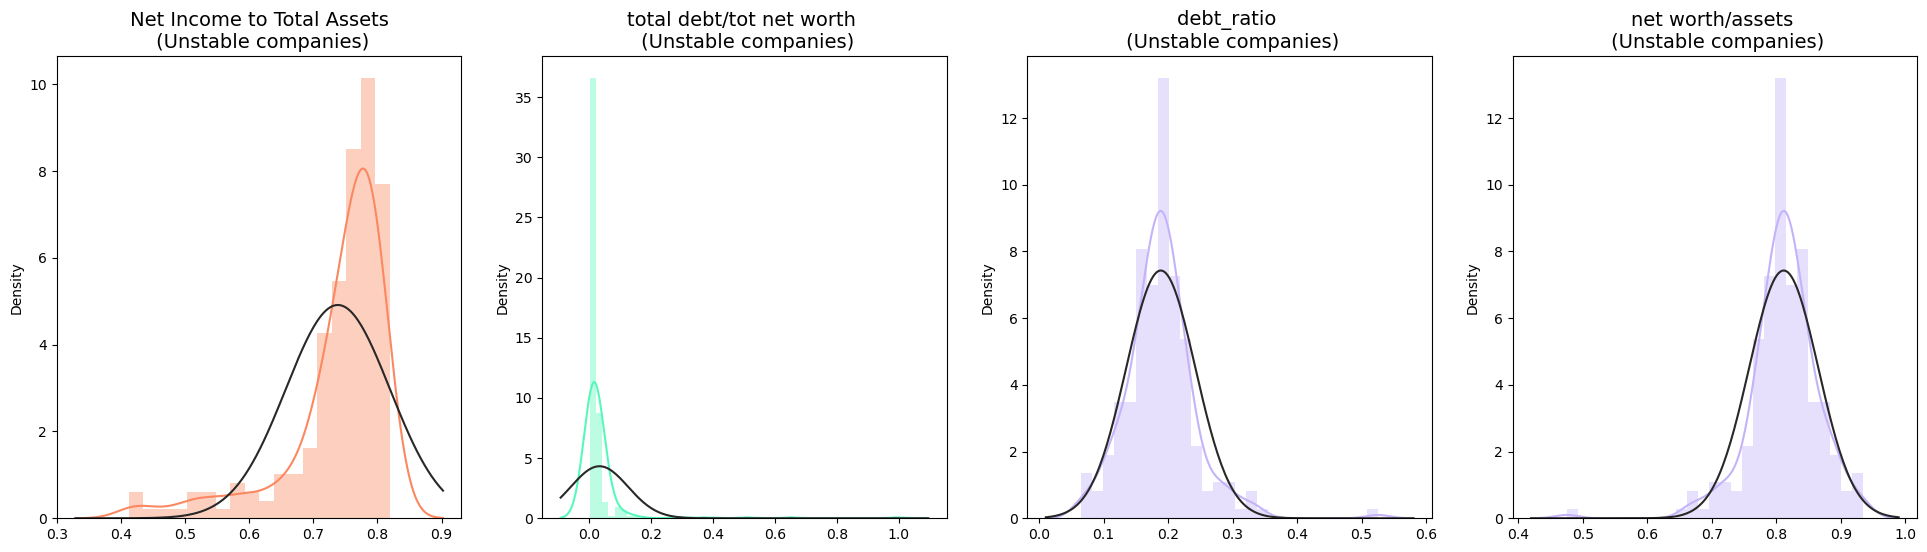

In [21]:
# Plotting the feature distributions for close to bankrputcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = new_df['Net Income to Total Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = new_df['Total debt/Total net worth'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = new_df['Debt ratio %'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = new_df['Net worth/Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

C:\Users\ThunderBolt\AppData\Local\Temp\ipykernel_33176\2985956469.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
C:\Users\ThunderBolt\AppData\Local\Temp\ipykernel_33176\2985956469.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cash_tot_as

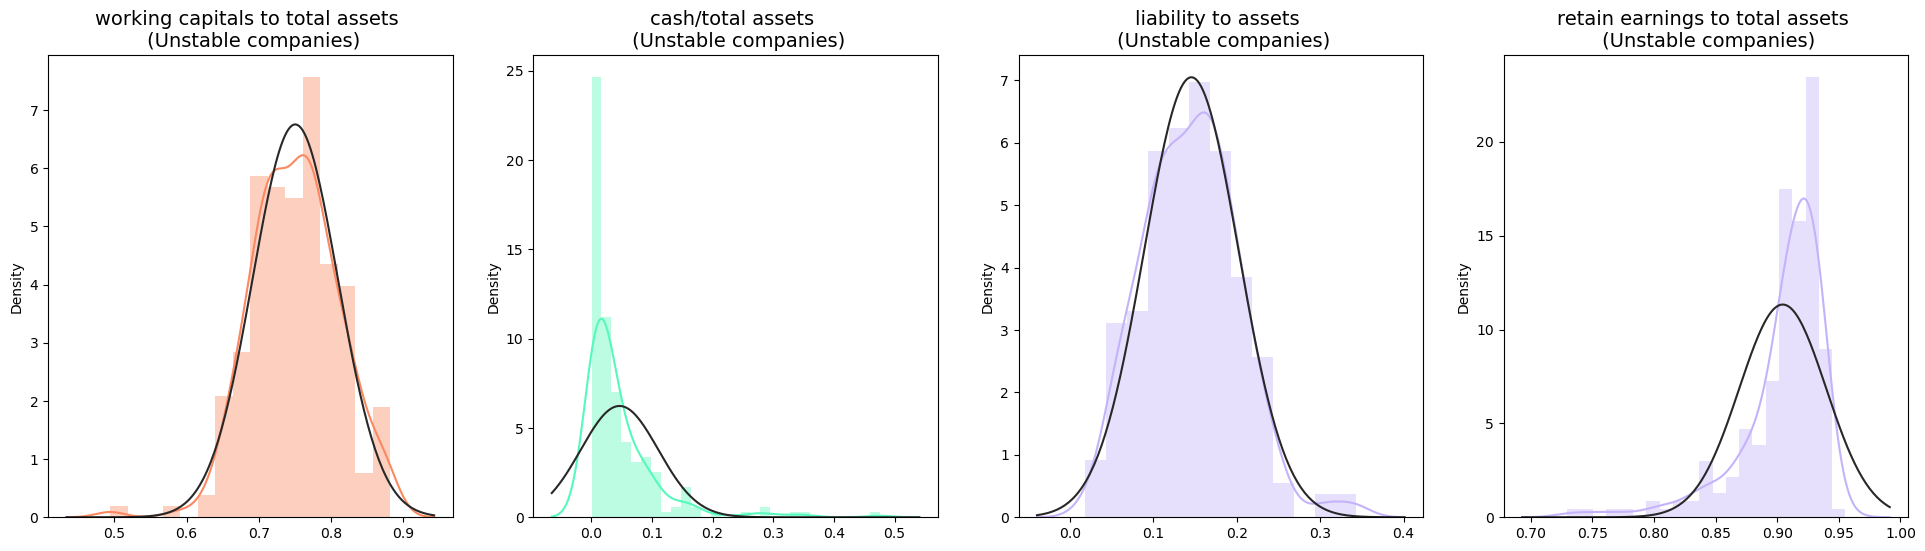

In [22]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = new_df['Working Capital to Total Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = new_df['Cash/Total Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = new_df['Current Liability to Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = new_df['Retained Earnings to Total Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()

What we can see is that removing the extreme outliers definitely helps to obtain more "bell shape" distributions!(At least for the features showed)

In [56]:
## Hypothesis testing

from scipy.stats import chi2_contingency, ttest_ind

# Example: T-test for numerical features
significant_features = []
for column in df.columns:
    if df[column].dtype in ['int64', 'float64'] and column != 'Bankrupt?':
        stat, p = ttest_ind(df[column][df['Bankrupt?'] == 1],
                            df[column][df['Bankrupt?'] == 0])
        if p < 0.05:
            significant_features.append(column)
            print(f'Feature: {column}, p-value: {p}')

Feature: ROA(C) before interest and depreciation before interest, p-value: 1.9508130590481686e-106
Feature: ROA(A) before interest and % after tax, p-value: 1.0337410064978046e-125
Feature: ROA(B) before interest and depreciation after tax, p-value: 7.094589584554345e-117
Feature: Operating Gross Margin, p-value: 1.225968760917423e-16
Feature: Realized Sales Gross Margin, p-value: 1.8594074115087882e-16
Feature: Research and development expense rate, p-value: 0.045399294843875504
Feature: Cash flow rate, p-value: 2.208652012981308e-09
Feature: Tax rate (A), p-value: 1.03734664902433e-19
Feature: Net Value Per Share (B), p-value: 5.058195942491242e-43
Feature: Net Value Per Share (A), p-value: 4.685136627397332e-43
Feature: Net Value Per Share (C), p-value: 1.0343321628410755e-42
Feature: Persistent EPS in the Last Four Seasons, p-value: 3.201174781319e-75
Feature: Cash Flow Per Share, p-value: 1.4593346337455764e-10
Feature: Operating Profit Per Share (Yuan ¥), p-value: 4.5110153812129

C:\Users\ThunderBolt\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [23]:
# Dividing Data and Labels

labels = new_df['Bankrupt?']
new_df = new_df.drop(['Bankrupt?'], axis = 1)

In [24]:
def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

data_norm = log_trans(new_df)

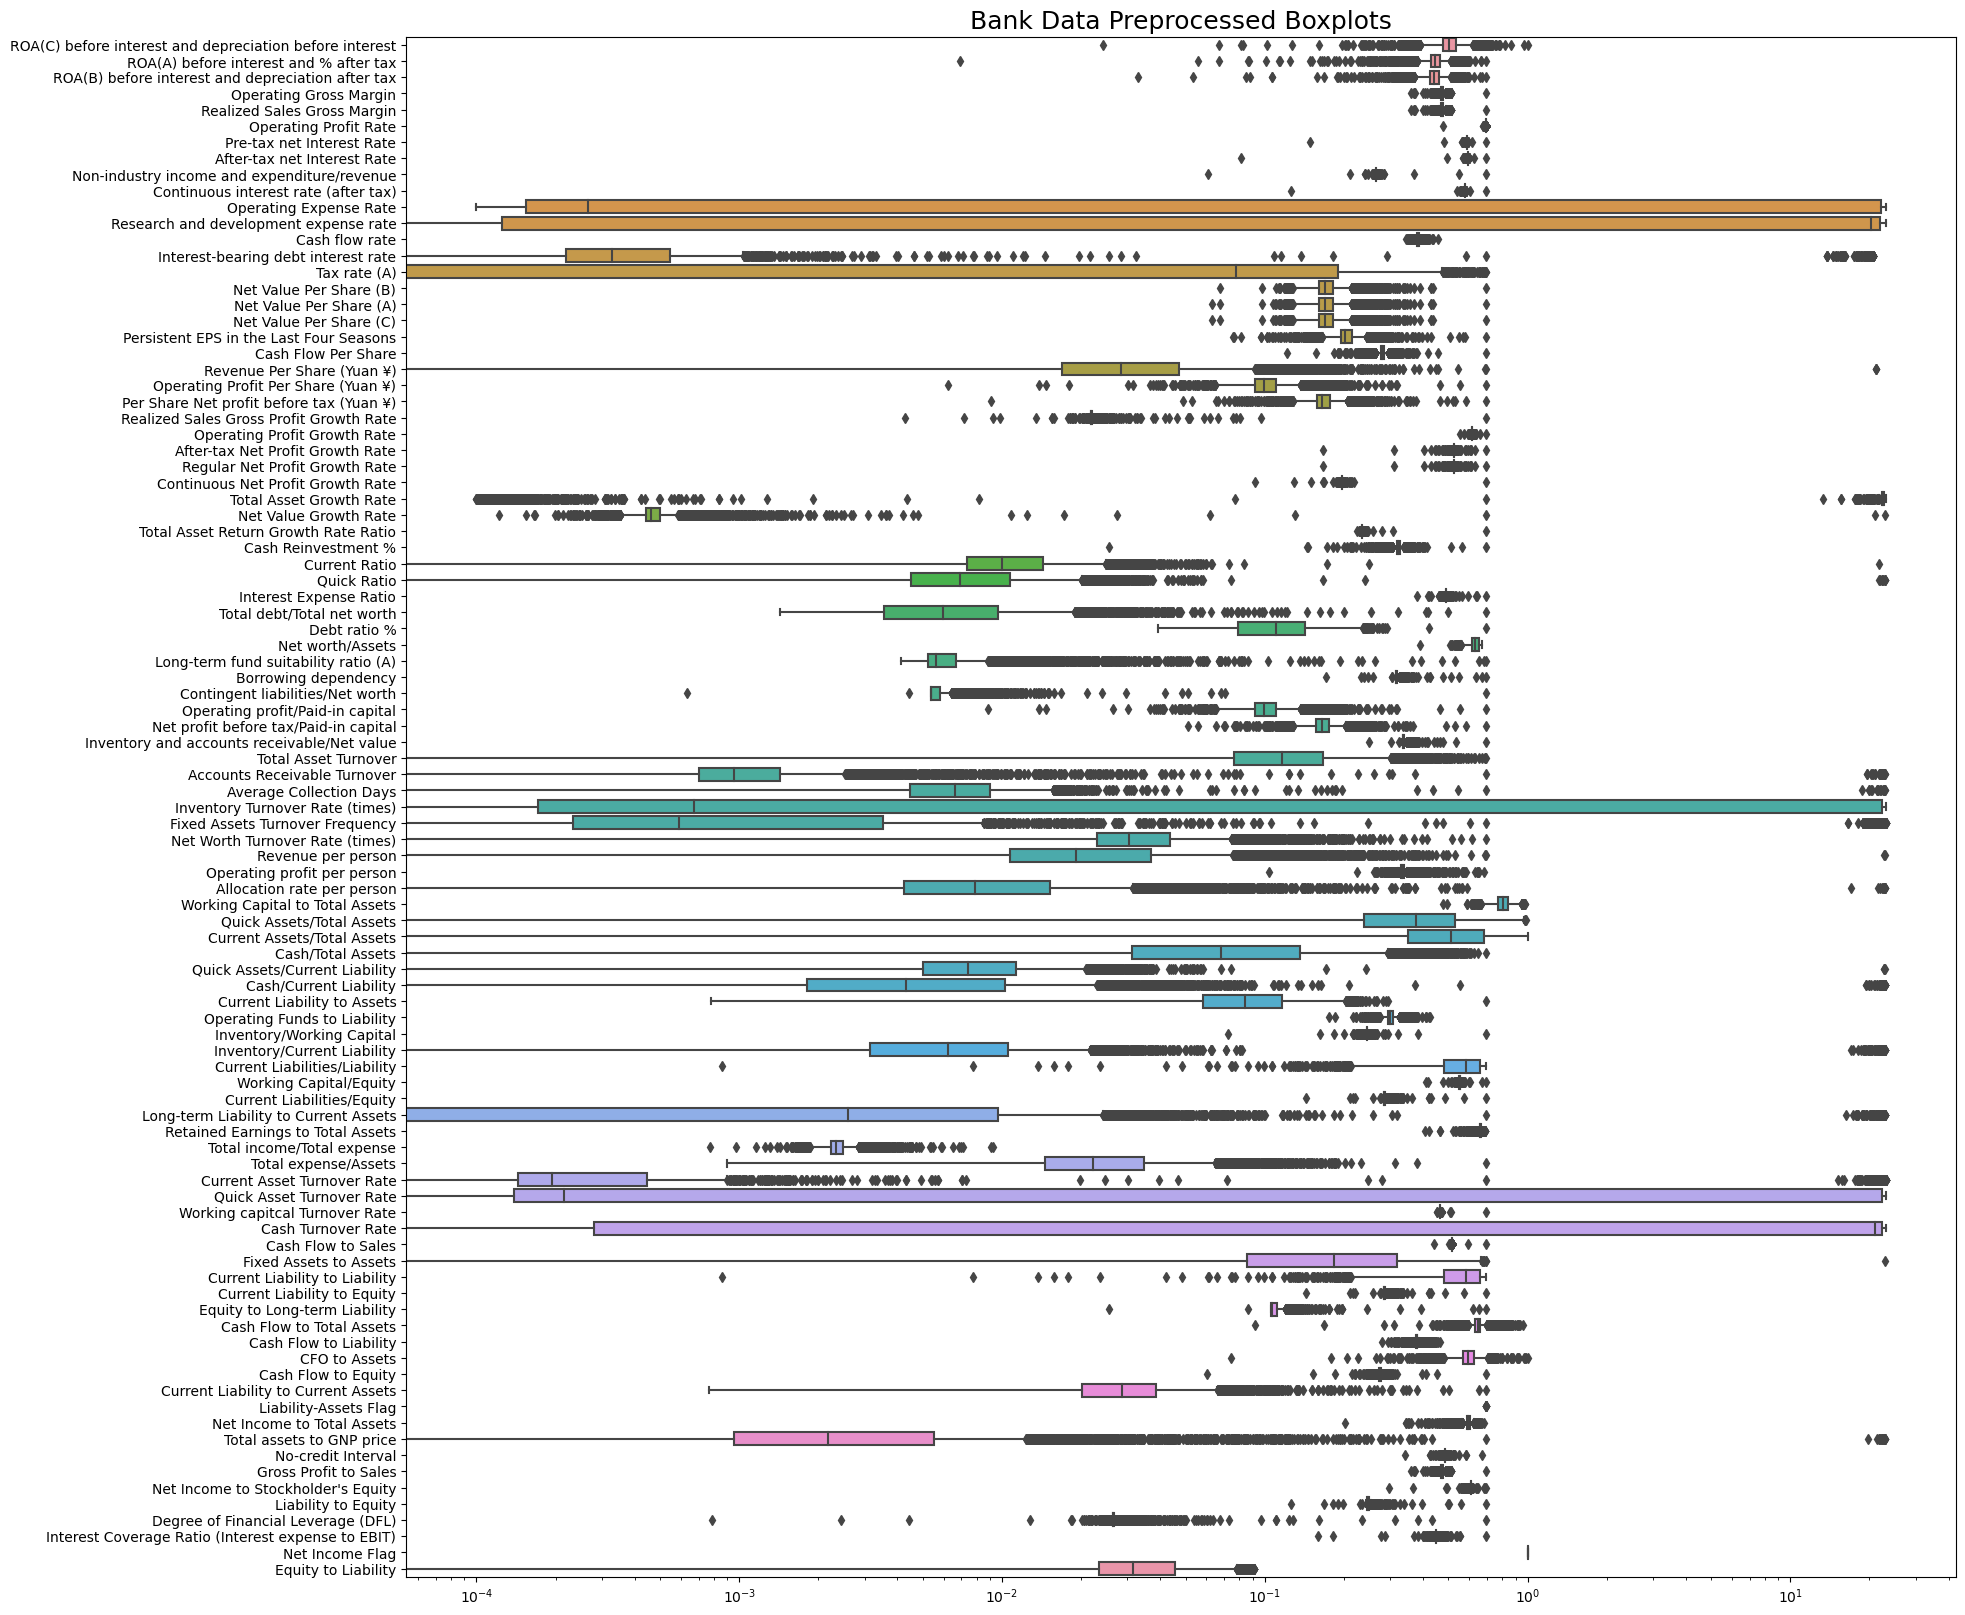

In [25]:
# Plotting Boxplots of the preprocessed numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = data_norm, orient="h")
ax.set_title('Bank Data Preprocessed Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

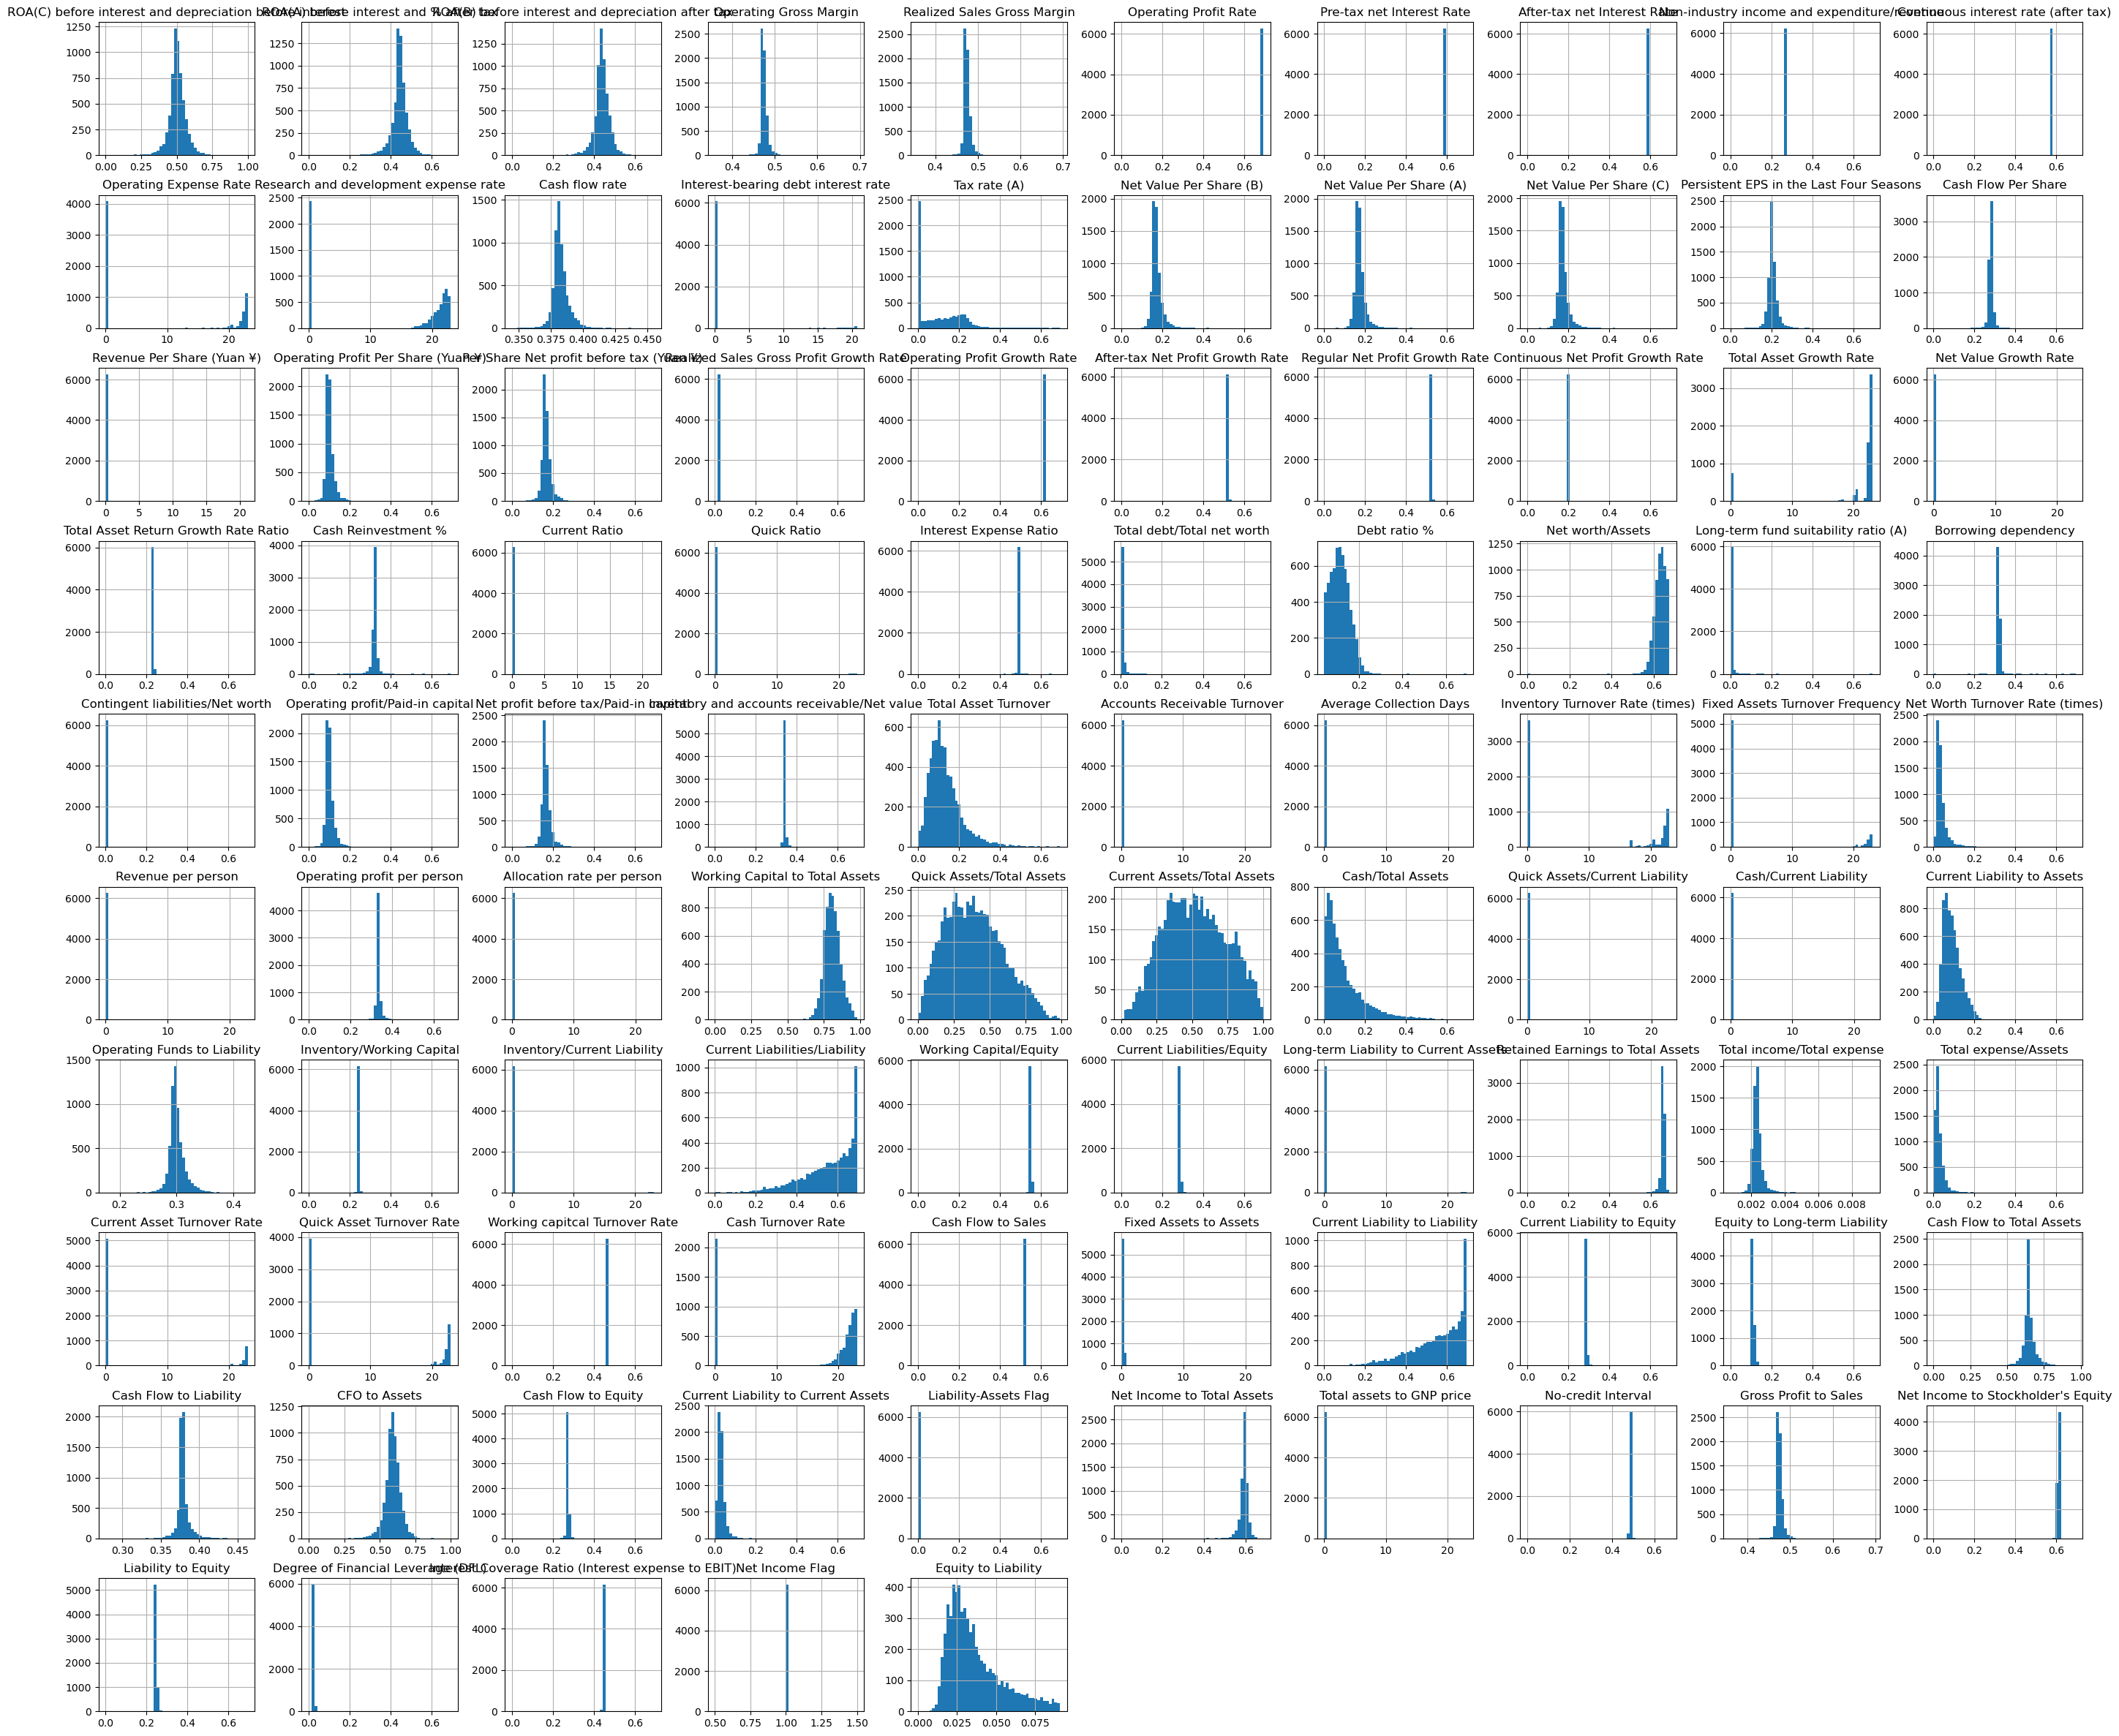

In [26]:
data_norm.hist(figsize = (35,30),bins = 50)
plt.show()

## Modeling

In [27]:
# Splitting Train and Test Data

X_raw,X_test,y_raw,y_test  = train_test_split(data_norm,
                                              labels,
                                              test_size=0.1,
                                              stratify = labels,
                                              random_state = 42)

## SMOTE
Using SMOTE as oversampling technique can help us improving the performance. 
Although it is likely that SMOTE will be more accurate than random under-sampling,
it will take more time to train since no rows are eliminated as previously stated.

MODELING
Now, let's see what we can do with our models! We will see the performances on the cleaned undersampled data 
and on the SMOTE oversampled data. For this part I decided to use a few different models:

- Logistic Regression

In [28]:
# Stratified Cross Validation Splitting

sss = StratifiedKFold(n_splits=5, shuffle=False)

for train_index, test_index in sss.split(X_raw,y_raw):
    
    print("Train:", train_index, "Test:", test_index)
    X_train_sm, X_val_sm = X_raw.iloc[train_index], X_raw.iloc[test_index]
    y_train_sm, y_val_sm = y_raw.iloc[train_index], y_raw.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train_sm, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val_sm, return_counts=True)
print('-' * 84)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train_sm))
print(test_counts_label/ len(y_val_sm))

Train: [1005 1097 1131 ... 5640 5641 5642] Test: [   0    1    2 ... 1128 1129 1130]
Train: [   0    1    2 ... 5640 5641 5642] Test: [1005 1097 1131 ... 2256 2257 2258]
Train: [   0    1    2 ... 5640 5641 5642] Test: [2224 2259 2260 ... 3384 3385 3438]
Train: [   0    1    2 ... 5640 5641 5642] Test: [3386 3387 3388 ... 4512 4513 4514]
Train: [   0    1    2 ... 4512 4513 4514] Test: [4515 4516 4517 ... 5640 5641 5642]
------------------------------------------------------------------------------------
Label Distributions: 

[0.96522702 0.03477298]
[0.96542553 0.03457447]


In [29]:
# List to append the score and then find the average

accuracy_lst_reg = []
precision_lst_reg = []
recall_lst_reg = []
f1_lst_reg = []
auc_lst_reg = []

log_reg_sm = LogisticRegression()
#log_reg_params = {}
log_reg_params = {"penalty": ['l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_reg = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model_reg = pipeline_reg.fit(X_train_sm[train], y_train_sm[train])
    best_est_reg = rand_log_reg.best_estimator_
    prediction_reg = best_est_reg.predict(X_train_sm[val])
    
    accuracy_lst_reg.append(pipeline_reg.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_reg.append(precision_score(y_train_sm[val], prediction_reg))
    recall_lst_reg.append(recall_score(y_train_sm[val], prediction_reg))
    f1_lst_reg.append(f1_score(y_train_sm[val], prediction_reg))
    auc_lst_reg.append(roc_auc_score(y_train_sm[val], prediction_reg))


print('---' * 45)
print('')
print('Logistic Regression results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_reg)))
print("precision: {}".format(np.mean(precision_lst_reg)))
print("recall: {}".format(np.mean(recall_lst_reg)))
print("f1: {}".format(np.mean(f1_lst_reg)))
print('')
print('---' * 45)

C:\Users\ThunderBolt\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ThunderBolt\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ThunderBolt\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\ThunderBolt\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ThunderBolt\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\ThunderBolt\anaconda3\Lib\site-packag

C:\Users\ThunderBolt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ThunderBolt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ThunderBolt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ThunderBolt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ThunderBolt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ThunderBolt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:35

---------------------------------------------------------------------------------------------------------------------------------------

Logistic Regression results:

accuracy: 0.8883720930232558
precision: 0.20303457914816941
recall: 0.7381048387096774
f1: 0.31773575291650075

---------------------------------------------------------------------------------------------------------------------------------------


C:\Users\ThunderBolt\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ThunderBolt\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [33]:
# Printing the classification report

label = ['Fin.Stable', 'Fin.Unstable']
pred_reg_sm = best_est_reg.predict(X_val_sm)
print(classification_report(y_val_sm, pred_reg_sm, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.90      0.94      1089
Fin.Unstable       0.20      0.67      0.31        39

    accuracy                           0.90      1128
   macro avg       0.59      0.79      0.63      1128
weighted avg       0.96      0.90      0.92      1128



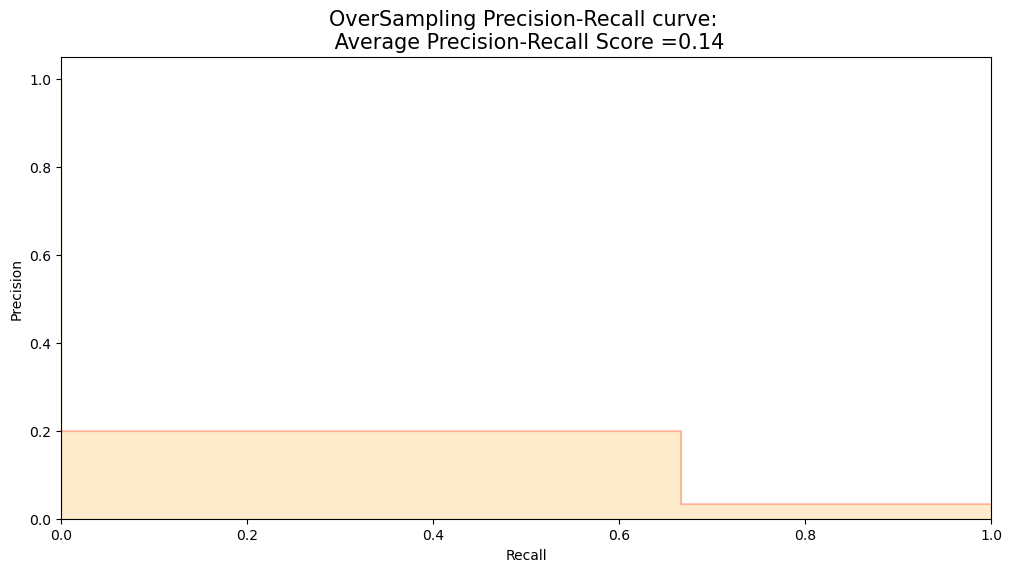

In [34]:
# Plotting Precision-Recall curve

y_score_reg = best_est_reg.predict(X_val_sm)

average_precision = average_precision_score(y_val_sm, y_score_reg)

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_val_sm, y_score_reg)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=15)

plt.show()

In [ ]:
## Results

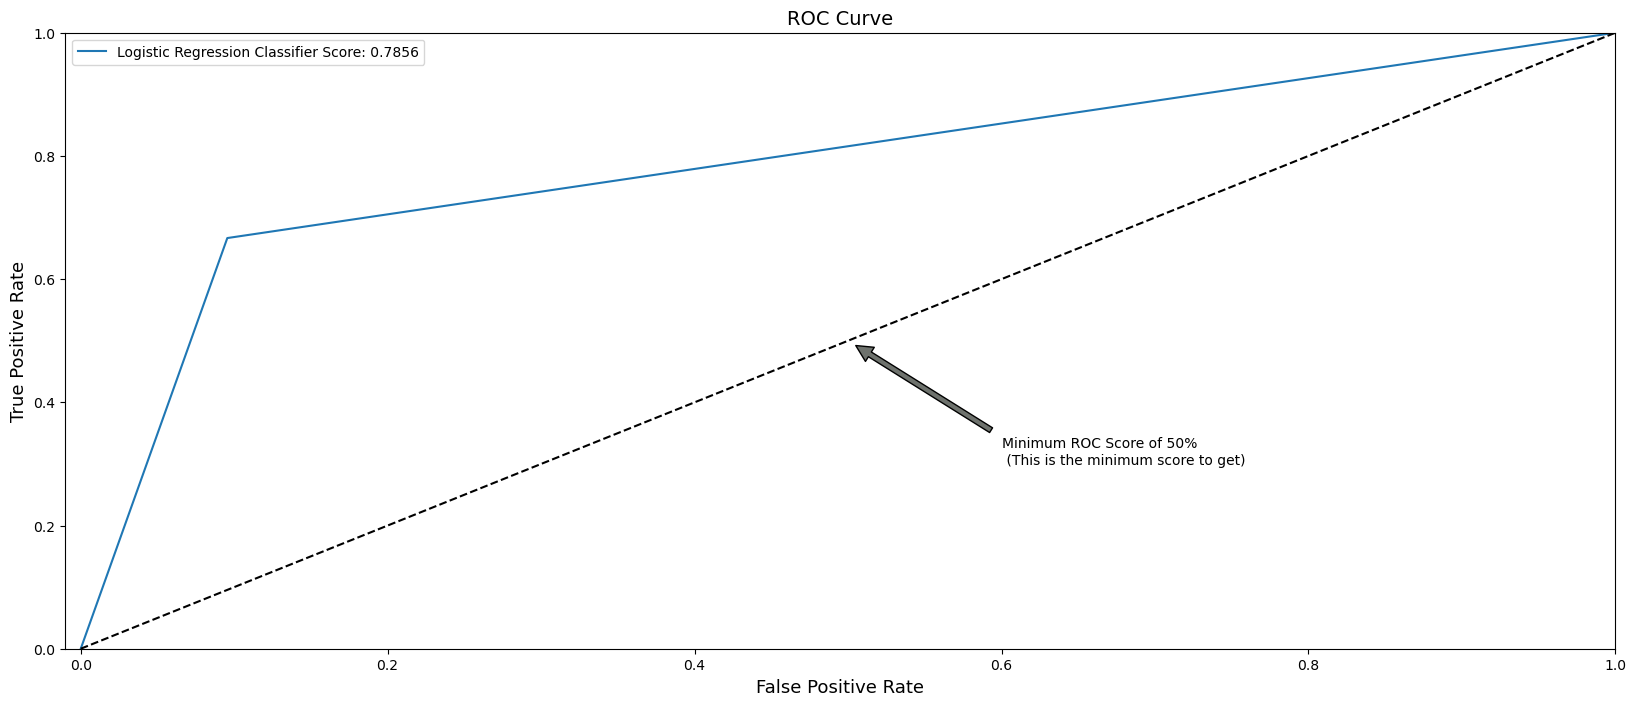

In [42]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_val_sm, pred_reg_sm)


def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_val_sm, pred_reg_sm)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr)
plt.show()

Text(0.5, 1.0, 'Logistic Regression')

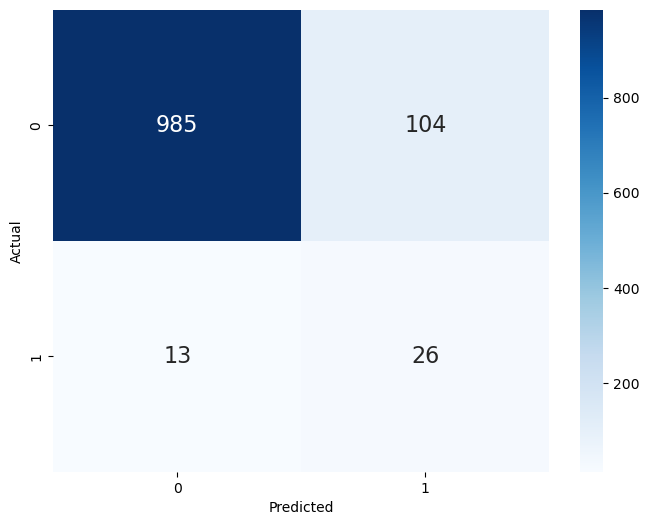

In [48]:
# Plotting confusion matrix

conf_mx0 = confusion_matrix(y_val_sm,pred_reg_sm)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

plt.figure(figsize=(8, 6))

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')
ax[0].set_title('Logistic Regression', fontsize = 20)


# Key Observation :
    
1. Imbalance in Class Distribution:
Support for Fin.Stable: 1089
Support for Fin.Unstable: 39
The dataset is highly imbalanced, with "Fin.Stable" instances greatly outnumbering "Fin.Unstable" instances.
2. High Precision for Fin.Stable:
Precision: 0.99
The model is very effective at correctly predicting "Fin.Stable" instances, with a very low false positive rate for this class.
3. Moderate Recall for Fin.Stable:
Recall: 0.90
While the recall is high, it indicates that 10% of the actual "Fin.Stable" instances are being missed by the model.
4. Low Precision for Fin.Unstable:
Precision: 0.20
The model has a high false positive rate for "Fin.Unstable," indicating that many instances predicted as "Fin.Unstable" are actually "Fin.Stable."
5. High Recall for Fin.Unstable:
Recall: 0.67
The model successfully identifies 67% of the actual "Fin.Unstable" instances, showing that it is relatively good at capturing the minority class despite its imbalanced nature.
6. Disparity in F1-Scores:
F1-score for Fin.Stable: 0.94
F1-score for Fin.Unstable: 0.31
The large difference in F1-scores highlights the model's uneven performance across the two classes, performing well on the majority class and poorly on the minority class.
7. Macro vs. Weighted Averages:
Macro Precision: 0.59, Macro Recall: 0.79, Macro F1-score: 0.63
Weighted Precision: 0.96, Weighted Recall: 0.90, Weighted F1-score: 0.92
The macro averages treat each class equally, showing a moderate performance overall, while the weighted averages are skewed towards the performance on the majority class due to the class imbalance, resulting in higher values.
8. High Overall Accuracy:
Accuracy: 0.90
The model achieves a high overall accuracy, which can be misleading due to the class imbalance. The high accuracy is largely driven by the performance on the majority class ("Fin.Stable").
Summary:
Strengths:
The model performs exceptionally well for the "Fin.Stable" class in terms of precision, recall, and F1-score.
Weaknesses:
The model struggles with the "Fin.Unstable" class, particularly with precision, indicating a high number of false positives.
The imbalanced dataset affects the model's performance metrics, making overall accuracy less informative about the model's ability to handle the minority class.  

# key insights based on the classification report:

1. Impact of Class Imbalance:
The significant class imbalance (1089 "Fin.Stable" vs. 39 "Fin.Unstable") heavily influences the model's performance. This imbalance causes the model to perform exceptionally well on the majority class ("Fin.Stable") but poorly on the minority class ("Fin.Unstable").
2. Strong Performance on Majority Class:
The model exhibits excellent precision (0.99) and good recall (0.90) for the "Fin.Stable" class. This indicates that the model is highly effective at correctly identifying "Fin.Stable" instances with very few false positives.
3. Weak Performance on Minority Class:
For the "Fin.Unstable" class, the model has low precision (0.20), meaning that most of the instances predicted as "Fin.Unstable" are incorrect. However, the recall is relatively high (0.67), indicating that the model can correctly identify the majority of the actual "Fin.Unstable" instances despite many false positives.
4. Discrepancy in F1-Scores:
The F1-score for "Fin.Stable" is 0.94, while for "Fin.Unstable," it is only 0.31. This discrepancy highlights that the model's ability to balance precision and recall is strong for the majority class but weak for the minority class.
5. Macro vs. Weighted Averages:
The macro averages (precision: 0.59, recall: 0.79, F1-score: 0.63) provide a more balanced view of the model's performance across both classes, treating them equally.
The weighted averages (precision: 0.96, recall: 0.90, F1-score: 0.92) are dominated by the majority class due to the imbalance, resulting in higher values that might mask the poor performance on the minority class.
6. High Overall Accuracy with Caveats:
The overall accuracy is high (0.90), but this can be misleading because it is largely driven by the model's performance on the majority class. Accuracy alone is not a sufficient metric in imbalanced datasets.
7. Need for Improved Minority Class Handling:
The low precision for "Fin.Unstable" suggests that the model needs improvement in correctly identifying the minority class without increasing false positives.